# Libraries

In [6]:
import matplotlib.pyplot as plt # plotting library
import numpy as np              # a matrix manipulation library
from matplotlib.collections import EllipseCollection
from matplotlib.patches import Ellipse
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# Paramters

In [7]:
xi = complex(0,1) # squareroot of -1

# Functions

In [8]:
# function that generates the transverse profile of the field
#################################################################
def field(x,y, l_r,l_l):
    z = 0.0;
    w_0 = 0.006;                 # Beam waist
    wavelength = 780e-7;
    k_0 = 2*np.pi/wavelength;    # Wavenumber of light
    z_R = k_0*w_0**2/2.0;        # Calculate the Rayleigh range

    theta = np.pi/4; beta = 0.0;

    g_r = 1.0; g_l = 1.0;
    
    r = np.sqrt(x**2 + y**2)*w_0;
    phi = np.arctan2(y, x);
    
    w_z = w_0*np.sqrt(1.0 + z**2/z_R**2);
    eta_z = np.arctan2(z,z_R);

# ======================================================
    LG_l0_l = (r*np.sqrt(2.0)/w_z)**abs(l_l)*np.exp(xi*l_l*phi)*\
    np.exp(-(r/w_z)**2)*np.exp(xi*k_0*r**2*z/(2*(z**2 + z_R**2)))*\
    np.exp(-xi*(abs(l_l) + 1.0)*eta_z)*(1.0/np.sqrt(1+(z/z_R)**2));

    LG_l0_r = (r*np.sqrt(2.0)/w_z)**abs(l_r)*np.exp(xi*l_r*phi)*\
    np.exp(-(r/w_z)**2)*np.exp(xi*k_0*r**2*z/(2*(z**2 + z_R**2)))*\
    np.exp(-xi*(abs(l_r) + 1.0)*eta_z)*(1.0/np.sqrt(1+(z/z_R)**2));

# Right and left circularly polarised component of light
# ======================================================
    E_r = g_r*np.sin(theta)*LG_l0_r*np.exp(xi*beta)
    E_l = g_l*np.cos(theta)*LG_l0_l
    
# x and y component of Electric field
    E_x = (E_r + E_l)/np.sqrt(2.0)
    E_y = -(E_r - E_l)*xi/np.sqrt(2.0)     

    return [E_x, E_y, E_r,E_l]
# ****************************************************************************************************
# ****************************************************************************************************

# ****************************************************************************************************
#           Function for finding the orientation and ellipticity of the polarization ellipses
# ****************************************************************************************************
def ellipses(E_x, E_y):   
# stokes parameters
    s_0 = np.abs(E_x)**2 + np.abs(E_y)**2    # I
    s_1 = np.abs(E_x)**2 - np.abs(E_y)**2    # Q
    s_2 = 2.0*np.real(np.conjugate(E_x)*E_y) # U
    s_3 = 2.0*np.imag(np.conjugate(E_x)*E_y) # V

# orientation
    zai = 0.5*np.arctan2(s_2,s_1)

# ellipticity
    chi = 0.5*np.arcsin(s_3/s_0)
    return [zai, chi]

# Plotting begins here

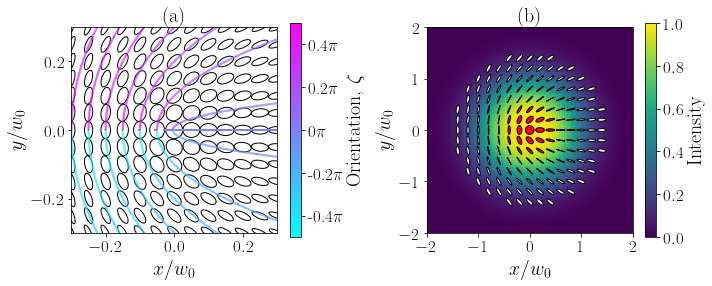

In [9]:
# Enable latex fonts
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]})

# Define your figure and its axes

fig, (axes1, axes2) = plt.subplots(ncols=2,figsize=(10, 4),subplot_kw={'aspect': 'equal'}) 
# subplot_kw={'aspect': 'equal'} makes sure the each plot is a square


# ***************************************************************************************************************
#                            plotting (a): Streamlines of lemon VB with polarization ellipses overlayed
# ***************************************************************************************************************
# define the XY grid
x_min = -0.5; # minimum value of x
x_max = 0.5; # maximum value of x
x_range = abs(x_max - x_min); # range of x
dx = 0.001; # step size along x axis
lx = int(x_range/dx)+1 # no. of points along x axis

# full coorindate arrays
xx, yy = np.meshgrid(np.linspace(x_min, x_max, lx), np.linspace(x_min, x_max, lx)) # this will create a 2D matrix containing the coordinates (x,y)
XY = np.column_stack((xx.ravel(), yy.ravel()))

E_x, E_y, E_r, E_l = field(xx, yy, 1, 0)

zai,chi = ellipses(E_x, E_y)  

# x component 
u = np.cos(zai)
# y component
v = np.sin(zai)


stream_starting_points_lemon = [[0,0], # straight line passing through 0,0
                                [0,0.01],[0,-0.01],
                                [-0.05,0.002],[-0.1,0.002],[-0.15,0.002],[-0.2,0.002],[-0.25,0.002],[-0.3,0.002],          # streamlines in 2nd quadrant
                                [-0.05,-0.002],[-0.1,-0.002],[-0.15,-0.002],[-0.2,-0.002],[-0.25,-0.002],[-0.3,-0.002]]

lemon_streamlines = axes1.streamplot(xx, yy, u, v,  start_points=stream_starting_points_lemon,\
                                     density = 50,linewidth = 2,color=zai/np.pi, cmap='cool',arrowstyle='-')

# add colour bar for the streamlines
cbar = fig.colorbar(lemon_streamlines.lines, ax=axes1, orientation='vertical', format = '%g$\pi$')
cbar.ax.tick_params(labelsize=17)
cbar.set_label('Orientation, $\zeta$', fontsize=20)  

#fig.tight_layout()

# plot the ellipses on top of the streamlines
#####################################################################################################

x_min = -1; # minimum value of x
x_max = 1; # maximum value of x
x_range = x_max - x_min; # range of x
dx = 0.05; # step size along x axis
dy = 0.05; # step size along y axis
lx = int(x_range/dx)+1 # no. of points along x axis
ly = int(x_range/dy)+1 # no. of points along x axis

# ***************************************************************************************************************
# ***************************************************************************************************************
x = np.linspace(x_min, x_max, lx)  # this will generate a vector containg x values from x_min to x_max
y = np.linspace(x_min, x_max, ly) # this will generate a vector containg y values from y_min to y_max

# full coorindate arrays
xx, yy = np.meshgrid(x, y) # this will create a 2D matrix containing the coordinates (x,y)

XY = np.column_stack((xx.ravel(), yy.ravel()))

E_x, E_y, E_r, E_l = field(xx, yy, 1, 0)

s_3 = np.abs(E_r.ravel())**2 - np.abs(E_l.ravel())**2	# s_3 in circular polarization basis

zai,chi = ellipses(E_x, E_y)

chi_flattened = chi.ravel()  # flatten chi
zai_flattened = zai.ravel()  # flatten chi

for i in range(0, lx*ly, 1):
    ellipse = Ellipse(XY[i], 0.05, 0.05*np.tan(chi_flattened[i]),180*zai_flattened[i]/np.pi)
    axes1.add_artist(ellipse)
    ellipse.set_alpha(1)             # alpha ranges from 0 to 1. It sets the transparency value
    ellipse.set_facecolor('none') 

#    if s_3[i]>0:
#        ellipse.set_facecolor('white')   # represents right circular polarization
#    elif s_3[i]<0:
#        ellipse.set_facecolor('red')    # represents left circular polarization
#    elif zai_flattened[i]>-6 and zai_flattened[i]<6:
#        ellipse.set_facecolor('blue')    # represents left circular polarization  

    ellipse.set_edgecolor('black')

# x and y range
axes1.set_xlim(-0.3, 0.3)
axes1.set_ylim(-0.3, 0.3)

# axis labels
axes1.set_xlabel('$x/w_0$', fontname='Times New Roman',fontsize=20)
axes1.set_ylabel('$y/w_0$', fontname='Times New Roman',fontsize=20)

# ticks
axes1.xaxis.set_tick_params(labelsize=17)
axes1.yaxis.set_tick_params(labelsize=17)
axes1.xaxis.set_major_locator(MultipleLocator(0.2))
axes1.yaxis.set_major_locator(MultipleLocator(0.2))


# ***************************************************************************************************************
#                                lotting (b): lemon vector beam intensity and polarization distribution
# ***************************************************************************************************************

#  plot the intenisty distribution on top of the polarization distribution
###############################################################################
x_min = -2; # minimum value of x
x_max = 2; # maximum value of x
x_range = x_max - x_min; # range of x
dx = 0.05; # step size along x axis
lx = int(x_range/dx)+1 # no. of points along x axis

# full coorindate arrays
xx, yy = np.meshgrid(np.linspace(x_min, x_max, lx), np.linspace(x_min, x_max, lx)) # this will create a 2D matrix containing the coordinates (x,y)

E_x, E_y, E_r, E_l = field(xx, yy, 1, 0)

#  intensity of the field
E = np.abs(E_x)**2 + np.abs(E_y)**2

ax = axes2.pcolormesh(xx, yy, E/np.max(E), cmap ='viridis', vmin = 0, vmax = 1, shading ='auto')

cbar = plt.colorbar(ax)
cbar.set_label('Intensity', fontsize=20)             # label on the colour bar
cbar.ax.tick_params(labelsize=17)


# plot the ellipses first
####################################################
x_min = -2; # minimum value of x
x_max = 2; # maximum value of x
x_range = x_max - x_min; # range of x
dx = 0.2; # step size along x axis
lx = int(x_range/dx)+1 # no. of points along x axis


# full coorindate arrays
xx, yy = np.meshgrid(np.linspace(x_min, x_max, lx), np.linspace(x_min, x_max, lx)) # this will create a 2D matrix containing the coordinates (x,y)

XY = np.column_stack((xx.ravel(), yy.ravel()))

E_x, E_y, E_r, E_l = field(xx, yy, 1, 0)

s_3 = np.abs(E_r.ravel())**2 - np.abs(E_l.ravel())**2	# s_3 in circular polarization basis

zai,chi = ellipses(E_x, E_y)

chi_flattened = chi.ravel() # flatten the 2D matrix chi
zai_flattened = zai.ravel() # flatten the 2D matrix chi

for i in range(lx*lx):
    ellipse = Ellipse(XY[i], 0.17, 0.17*np.tan(chi_flattened[i]),180*zai_flattened[i]/np.pi)
    axes2.add_artist(ellipse)
    ellipse.set_alpha(1)             # alpha ranges from 0 to 1. It sets the transparency value

    if s_3[i]>0 and np.sqrt(XY[i][0]**2 + XY[i][1]**2) < 1.5 :
        ellipse.set_facecolor('white')   # represents right circular polarization
        ellipse.set_edgecolor('black')
    elif s_3[i]<0 and np.sqrt(XY[i][0]**2 + XY[i][1]**2) < 1.5:
        ellipse.set_facecolor('red')    # represents left circular polarization
        ellipse.set_edgecolor('black')
    elif zai_flattened[i]>-6 and zai_flattened[i]<6 and np.sqrt(XY[i][0]**2 + XY[i][1]**2) < 1.5:
        ellipse.set_facecolor('blue')    # represents left circular polarization
        ellipse.set_edgecolor('black')
    else:
        ellipse.set_facecolor('none')
        ellipse.set_edgecolor('none')
    


axes2.set_xlabel('$x/w_0$', fontname='Times New Roman',fontsize=20)
axes2.set_ylabel('$y/w_0$', fontname='Times New Roman',fontsize=20)

# ticks
axes2.xaxis.set_tick_params(labelsize=17)
axes2.yaxis.set_tick_params(labelsize=17)
axes2.xaxis.set_major_locator(MultipleLocator(1))     # step size of major ticks along x-axis
axes2.yaxis.set_major_locator(MultipleLocator(1))     # step size of major ticks along x-axis

# x and y range
axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

# titles of the individual plots
axes1.set_title('(a)', fontname='Times New Roman',fontsize=20)
axes2.set_title('(b)', fontname='Times New Roman',fontsize=20)

fig.tight_layout()

# Important note:  All things that you want to see on the saved file should appear before the save statement

# save the plot to a file
#plt.savefig('Lemon_streamlines_and_VB.png',  dpi=500, transparent = False, bbox_inches='tight') # bbox_inches = 'tight' prevents axis label clipping while saving the file
plt.savefig('figure12.eps', format='eps', dpi=10)
plt.savefig('figure12.png', transparent = False, format='png', dpi=300, bbox_inches='tight')

# show plot
plt.show()



In [10]:
print("2nd tuple = ",XY[2])
print("1st element of 2nd tuple = ", XY[2][0])
print("2nd element of 2nd tuple = ", XY[2][1])

2nd tuple =  [-1.6 -2. ]
1st element of 2nd tuple =  -1.6
2nd element of 2nd tuple =  -2.0


# Coding tips

1) XY[i] gives the ith tuple. While XY[i][0] gives 1st element of the tuple and XY[i][1] gives the 2nd element of the ith tuple. Check the resutls shown above
2)To get a streamplot without arrowheads, pass arrowstyle='-' i.e
plt.streamplot(X, Y, U, V, arrowstyle='-').

https://github.com/matplotlib/matplotlib/issues/19361